<h1 align="center">Regression with Indicator Variables</h1>

In [1]:
%pylab inline
pylab.style.use('ggplot')
import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


    Heart attacks in rabbits. When heart muscle is deprived of oxygen, the tissue dies and leads to a heart attack ("myocardial infarction"). Apparently, cooling the heart reduces the size of the heart attack. It is not known, however, whether cooling is only effective if it takes place before the blood flow to the heart becomes restricted. Some researchers (Hale, et al, 1997) hypothesized that cooling the heart would be effective in reducing the size of the heart attack even if it takes place after the blood flow becomes restricted.

    To investigate their hypothesis, the researchers conducted an experiment on 32 anesthetized rabbits that were subjected to a heart attack. The researchers established three experimental groups:

        Rabbits whose hearts were cooled to 6º C within 5 minutes of the blocked artery ("early cooling")
        Rabbits whose hearts were cooled to 6º C within 25 minutes of the blocked artery ("late cooling")
        Rabbits whose hearts were not cooled at all ("no cooling")

    At the end of the experiment, the researchers measured the size of the infarcted (i.e., damaged) area (in grams) in each of the 32 rabbits. But, as you can imagine, there is great variability in the size of hearts. The size of a rabbit's infarcted area may be large only because it has a larger heart. Therefore, in order to adjust for differences in heart sizes, the researchers also measured the size of the region at risk for infarction (in grams) in each of the 32 rabbits.    

In [21]:
import requests
url = 'https://onlinecourses.science.psu.edu/stat501/sites/onlinecourses.science.psu.edu.stat501/files/data/coolhearts.txt'
response = requests.get(url)
response.status_code

200

In [74]:
lines = [line.decode('ascii', 'ignore') for line in response.iter_lines()]
lines = [line.strip().replace('\x00', '').split('\t') for line in lines]
lines = [line for line in lines if len(line) > 1]

data = pd.DataFrame(data=lines[1:], columns=lines[0], dtype=np.float)

In [76]:
data.head()

Inf  Area  Group   X2   X3
0  0.119  0.34    3.0  0.0  0.0
1  0.190  0.64    3.0  0.0  0.0
2  0.395  0.76    3.0  0.0  0.0
3  0.469  0.83    3.0  0.0  0.0
4  0.130  0.73    3.0  0.0  0.0

In [78]:
pd.unique(data.X2)

array([ 0.,  1.])

In [79]:
pd.unique(data.X3)

array([ 0.,  1.])

In [80]:
data.Inf.groupby(data.X2).agg({'min': np.min, 'max': np.max, 'mean': np.mean})

mean    max    min
X2                         
0.0  0.438476  0.974  0.119
1.0  0.234636  0.588  0.033

In [81]:
data.Inf.groupby(data.X3).agg({'min': np.min, 'max': np.max, 'mean': np.mean})

mean    max    min
X3                         
0.0  0.315571  0.847  0.033
1.0  0.469273  0.974  0.149

In [82]:
data.corr()

Inf      Area     Group        X2        X3
Inf    1.000000  0.644560  0.326454 -0.446550  0.336712
Area   0.644560  1.000000 -0.189233  0.016552  0.289412
Group  0.326454 -0.189233  1.000000 -0.866138  0.027940
X2    -0.446550  0.016552 -0.866138  1.000000 -0.523810
X3     0.336712  0.289412  0.027940 -0.523810  1.000000

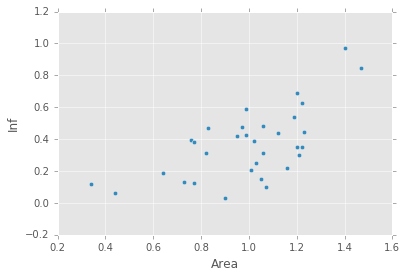

In [83]:
data.plot(kind='scatter', x='Area', y='Inf')

In [89]:
import statsmodels.formula.api as sm
data = data.rename(columns={'Inf': 'Infection'})
result = sm.ols(formula='Infection ~ Area', data=data).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Infection   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     21.32
Date:                Sat, 01 Apr 2017   Prob (F-statistic):           6.84e-05
Time:                        11:56:05   Log-Likelihood:                 12.105
No. Observations:                  32   AIC:                            -20.21
Df Residuals:                      30   BIC:                            -17.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1966      0.126     -1.560      0.129      -0.454       0.061
Area           0.5682      0.123      4.618      0.000       0.317       0.819
==============================================================================
Omnibus:                        0.604   Durbin-Watson:                   0.793
Prob(Omnibus):                  0.739   Jarque-Bera (JB):                0.651
Skew:                          -0.025   Prob(JB):                        0.722
Kurtosis:                       2.303   Cond. No.                         8.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
result = sm.ols(formula='Infection ~ Area + X2 + Group', data=data).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Infection   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     16.43
Date:                Sat, 01 Apr 2017   Prob (F-statistic):           2.36e-06
Time:                        11:58:21   Log-Likelihood:                 19.760
No. Observations:                  32   AIC:                            -31.52
Df Residuals:                      28   BIC:                            -25.66
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3315      0.224     -1.481      0.150      -0.790       0.127
Area           0.6127      0.107      5.723      0.000       0.393       0.832
X2            -0.1122      0.109     -1.030      0.312      -0.335       0.111
Group          0.0657      0.065      1.009      0.322      -0.068       0.199
==============================================================================
Omnibus:                        5.165   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.076   Jarque-Bera (JB):                3.657
Skew:                           0.591   Prob(JB):                        0.161
Kurtosis:                       4.159   Cond. No.                         26.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

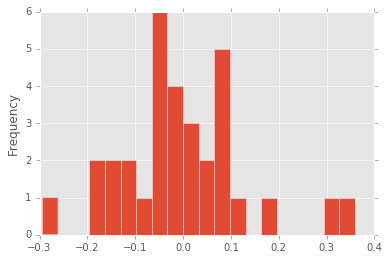

In [94]:
result.resid.plot(kind='hist', bins=20)